# Exploratory Data Analysis (EDA) on  Retail Sales 


**Project Overview**



This project analyzes retail sales data to uncover patterns in customer purchasing behavior. 

It includes exploring sales trends over time, identifying top product categories, and understanding how factors like age and gender impact spending. 


The insights help recommend strategies to boost revenue and engage different customer segments. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (1)\retail_sales_dataset.csv")
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  
0           3              50

In [3]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']) 
df = df.sort_values("Date")
df.set_index("Date", inplace=True)
print(df)

            index  Transaction ID Customer ID  Gender  Age Product Category  \
Date                                                                          
2023-01-01    521             522     CUST522    Male   46           Beauty   
2023-01-01    179             180     CUST180    Male   41         Clothing   
2023-01-01    558             559     CUST559  Female   40         Clothing   
2023-01-02    302             303     CUST303    Male   19      Electronics   
2023-01-02    978             979     CUST979  Female   19           Beauty   
...           ...             ...         ...     ...  ...              ...   
2023-12-29    232             233     CUST233  Female   51           Beauty   
2023-12-29    804             805     CUST805  Female   30           Beauty   
2023-12-31    856             857     CUST857    Male   60      Electronics   
2024-01-01    210             211     CUST211    Male   42           Beauty   
2024-01-01    649             650     CUST650    Mal

In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-01-01 to 2024-01-01
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1000 non-null   int64 
 1   Transaction ID    1000 non-null   int64 
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 78.1+ KB


index               0
Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [5]:
print(df.describe().round(1))



        index  Transaction ID     Age  Quantity  Price per Unit  Total Amount
count  1000.0          1000.0  1000.0    1000.0          1000.0        1000.0
mean    499.5           500.5    41.4       2.5           179.9         456.0
std     288.8           288.8    13.7       1.1           189.7         560.0
min       0.0             1.0    18.0       1.0            25.0          25.0
25%     249.8           250.8    29.0       1.0            30.0          60.0
50%     499.5           500.5    42.0       3.0            50.0         135.0
75%     749.2           750.2    53.0       4.0           300.0         900.0
max     999.0          1000.0    64.0       4.0           500.0        2000.0


In [6]:
df.mode().iloc[0]

index                      0
Transaction ID             1
Customer ID          CUST001
Gender                Female
Age                     43.0
Product Category    Clothing
Quantity                 4.0
Price per Unit          50.0
Total Amount            50.0
Name: 0, dtype: object

<Axes: title={'center': 'Weekly Sales Trend'}, xlabel='Date', ylabel='Weekly sales'>

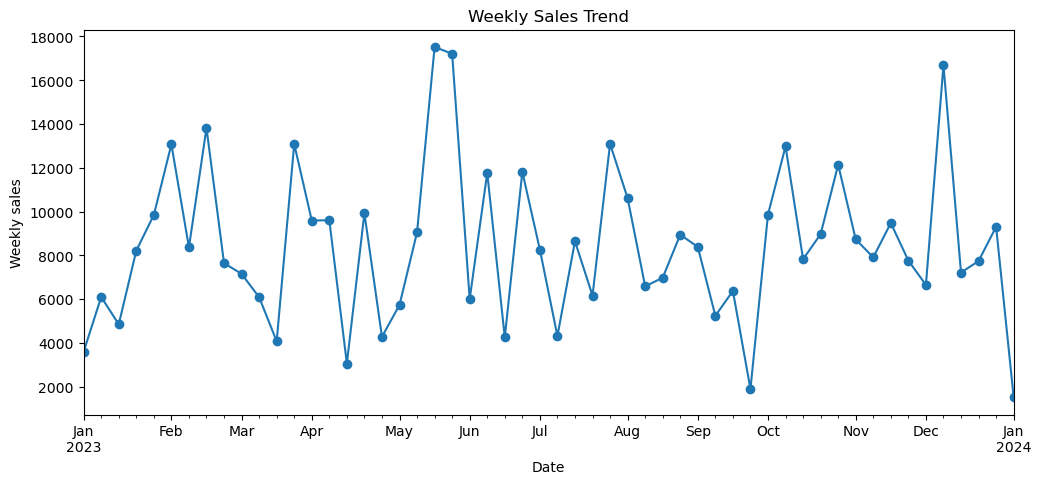

In [7]:
#Weekly sales trends
weekly_sales = df['Total Amount'].resample('W').sum()
weekly_sales.plot(marker='o',title="Weekly Sales Trend", figsize=(12, 5),ylabel="Weekly sales")



📈 Weekly Sales: Sales were high in the 2nd and 3rd weeks of May.



<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month', ylabel='Monthly sales'>

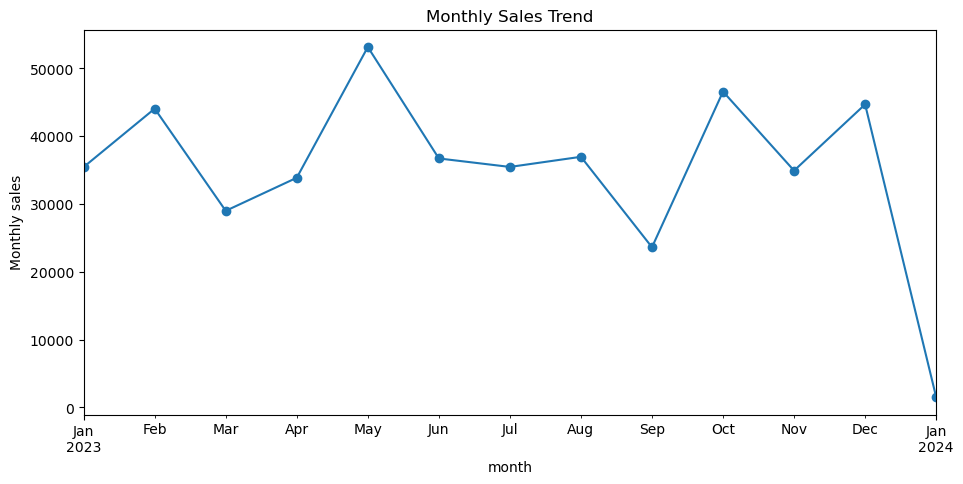

In [8]:
#monthly sales trends
monthly_sales = df['Total Amount'].resample('ME').sum()
monthly_sales.plot(marker='o',title="Monthly Sales Trend", figsize=(11, 5),ylabel="Monthly sales",xlabel="month")

📆 Monthly Sales:
May had the highest overall sales.

<Axes: title={'center': 'Category Revenue '}, xlabel='Product Category'>

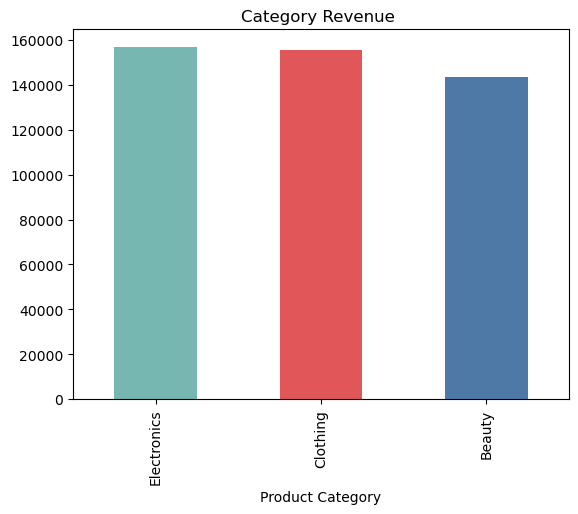

In [9]:
#Category Revenue 
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar",color=["#76B7B2","#E15759","#4E79A7"],title="Category Revenue ")

📊 Category Revenue :
Electronics made the most money.

<Axes: title={'center': 'Total Sales by Age Group'}, xlabel='Age Group', ylabel='Total Sales Amount'>

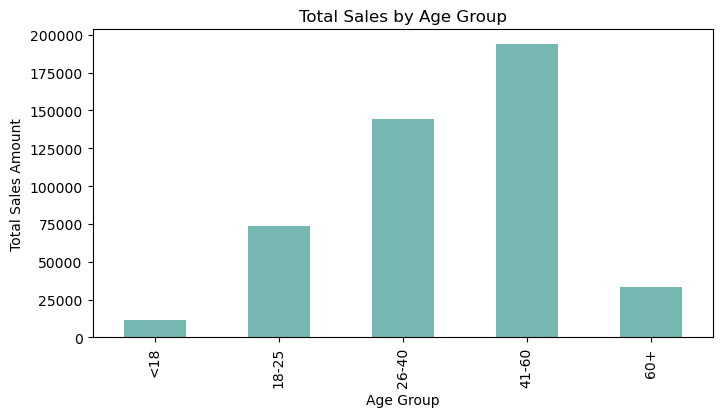

In [10]:
# Total revenue per age group
df['Age Group'] = pd.cut(
    df['Age'],
    bins=[0,18,25,40,60,100],
    labels=['<18', '18-25','26-40','41-60','60+']
)
age_group_sales = df.groupby('Age Group', observed=False)['Total Amount'].sum().sort_index()
age_group_sales.plot(kind='bar', color='#76B7B2',figsize=(8,4),title='Total Sales by Age Group',xlabel='Age Group',ylabel='Total Sales Amount')

👥 Age Group Sales:
People aged 41–60 bought the most.

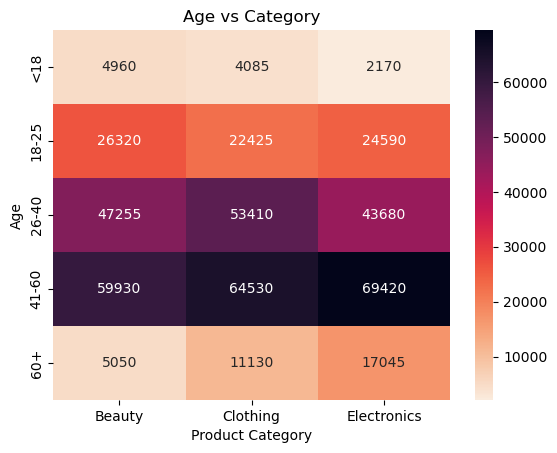

In [11]:
#age vs Category (Heatmap)
sns.heatmap(df.pivot_table(
    values='Total Amount',
    index=pd.cut(df['Age'], bins=[0,18,25,40,60,100], labels=['<18', '18-25','26-40','41-60','60+']),
    columns='Product Category',
    aggfunc='sum',
    fill_value=0,observed=False,
), annot=True, cmap='rocket_r', fmt='.0f')
plt.title("Age vs Category")
plt.show()


🔥 Age vs Category (Heatmap):
Looks like different age groups have different product preferences — helpful for planning targeted offers.

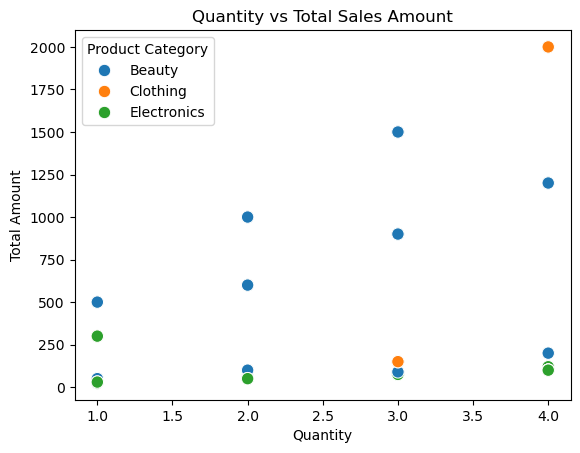

In [12]:
#quantity vs total sales amount
sns.scatterplot(x='Quantity', y='Total Amount', hue='Product Category', data=df,s=80)
plt.title('Quantity vs Total Sales Amount')
plt.show()


More quantity = more total spend — trend visible.

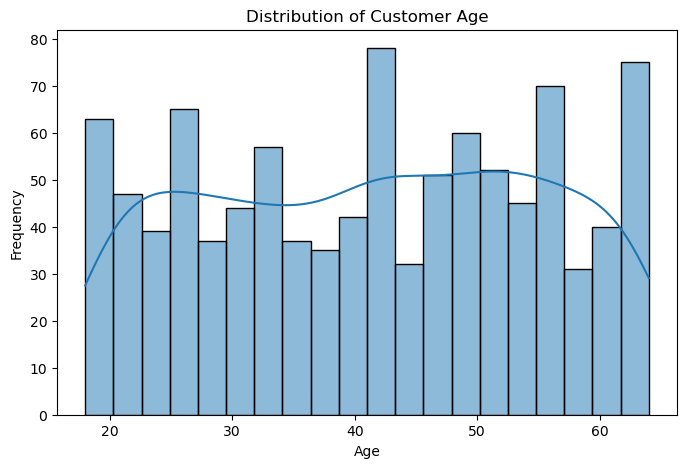

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].sort_values(), bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution is fairly uniform with slight peaks, indicating a balanced spread of customers across different age groups.

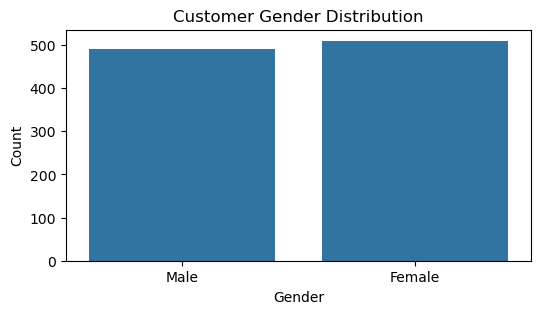

In [14]:
plt.figure(figsize=(6,3))
sns.countplot(x='Gender', data=df)
plt.title('Customer Gender Distribution')
plt.ylabel('Count')
plt.show()


Female customers are just a little more than males — not a huge gap, but still good to know.

**Recommendations:**


**1) Plan for Seasonal Spikes**

Since sales naturally peak in May, it is a good idea to organize special promotions or campaigns towards the end of April so that more sales are generated when demand is already so high.

**2) Double Down on Electronics**

Electronics generate the most revenue, so make sure that these products are available and highly featured on site or in-store displays.

**3) Re-Engage Low-Spending Categories**

Sales in the beauty category are much lower than this. Offer customers here specific deals, loyalty points, or product recommendations to get customers to purchase more here.

**4) Keep Top Shoppers Engaged**

Offer discounts and rewards to customers between 41–60 years old since they spend the most.

**5) Recruit New Age Groups**

Create promotions or promotions to reach consumers younger than 25 and older than 60 who buy less.

**6) Utilize Gender Insights**

As more women shop, consider offering special loyalty programs or referral incentives that they'll embrace.